In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 # for image visualization

#Loading the saved Model

In [2]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/Fruit_Vegetable_detection/Trained_Model_Fruits_30.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Visualization and Prediction

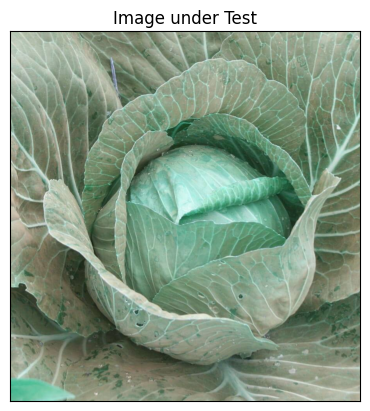

In [3]:
image_src = "/content/drive/MyDrive/Fruit_Vegetable_detection/test/cabbage/Image_3.jpg"
img = cv2.imread(image_src)
plt.imshow(img)
plt.title("Image under Test")
plt.xticks([]) # to avoid scales in x axis
plt.yticks([]) # to avoid scales in y axis
plt.show()

Testing the model

In [4]:
# we need to preprocess the image acc.to the format we used to train the model

image = tf.keras.preprocessing.image.load_img(image_src,target_size=(64,64))

input_arr = tf.keras.preprocessing.image.img_to_array(image)

input_arr = np.array([input_arr]) # converting to np format array



In [5]:
prd = cnn.predict(input_arr) # predict the input array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


In [6]:
print(prd) # max value is the prediction

[[2.3240475e-17 2.7715884e-15 1.4253218e-21 1.6951351e-13 1.0000000e+00
  6.2570074e-15 3.5195614e-20 5.0145176e-11 1.3814772e-17 6.7815531e-10
  2.0049840e-09 2.2585867e-15 5.0925404e-08 2.5137721e-13 3.4119274e-12
  2.9447726e-09 1.3404048e-13 2.1603372e-10 1.6113539e-09 9.9113220e-16
  1.9826291e-18 9.2683132e-21 9.6369378e-20 3.3713765e-14 5.3074743e-13
  1.8359964e-12 4.4523299e-22 4.1416162e-21 2.7008090e-11 3.5914978e-13
  5.3598202e-11 7.9779553e-13 6.9383771e-17 9.4017377e-22 7.3724649e-17
  1.8691532e-13]]


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_detection/test',
    labels="inferred", # images are placed in a driectory formet in Drive
    label_mode="categorical", # he labe is the name of the fruit / Vegetables
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [8]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
index = np.where(prd[0] == max(prd[0]))


it is a cabbage


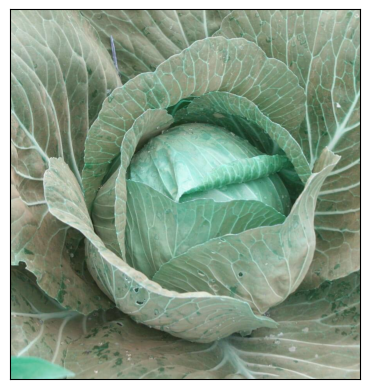

In [10]:
plt.imshow(img)
plt.title(print("it is a {}".format(test_set.class_names[index[0][0]])) )
plt.xticks([]) # to avoid scales in x axis
plt.yticks([]) # to avoid scales in y axis
plt.show()